In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns

# For visualisations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For UML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the data
df_1 = pd.read_csv('/workspaces/MLOps_Project/data/EL1.csv') # The path to the dataset should probably be changed when we're setting up the serverless-ml-pipeline
df_2 = pd.read_csv('/workspaces/MLOps_Project/data/EL2.csv') # The path to the dataset should probably be changed when we're setting up the serverless-ml-pipeline
df_3 = pd.read_csv('/workspaces/MLOps_Project/data/EL3.csv') # The path to the dataset should probably be changed when we're setting up the serverless-ml-pipeline


In [3]:
print(df_1.shape, df_2.shape, df_3.shape)

(8224, 19) (6314, 19) (6032, 19)


In [4]:
df_main = pd.concat([df_1, df_2, df_3], axis=0)

In [5]:
df_main.shape

(20570, 19)

In [6]:
df_main.sample(10)

,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi
7107,2024-03-26 01:03:20.322,3.04,3.25,284,-833,-322,6,6,4,4,4,4,6,6,PackageType.HEART_BEAT,6447,5,9.8,-98
2174,2024-03-05 10:03:31.885,3.04,5.50,459,-42,-1519,8,6,6,5,5,4,5,5,PackageType.HEART_BEAT,1438,5,10.0,-100
1207,2024-02-27 15:54:06.400,3.04,6.75,445,-527,-1771,65,47,55,17,20,20,15,12,PackageType.HEART_BEAT,1033,5,7.2,-101
1633,2024-02-29 21:26:41.123,3.12,5.00,542,-844,-1188,30,84,84,58,73,14,21,12,PackageType.HEART_BEAT,1266,5,9.0,-105
5843,2024-03-28 16:37:47.750,3.12,9.38,653,-621,-428,6,6,5,6,6,5,5,5,PackageType.HEART_BEAT,3027,5,9.2,-90
1041,2024-02-26 12:05:22.803,3.04,7.75,432,-125,-1531,7,5,5,4,4,5,4,6,PackageType.HEART_BEAT,967,5,7.5,-97
6046,2024-03-20 17:12:47.987,3.04,9.50,211,-806,-217,6,5,5,4,4,5,5,5,PackageType.HEART_BEAT,5554,5,9.2,-95
1662,2024-03-01 02:27:11.107,3.12,5.38,543,-797,-1054,32,87,87,53,64,16,16,10,PackageType.HEART_BEAT,1277,5,8.0,-109
3631,2024-03-15 08:46:38.128,3.04,10.12,425,-21,-1361,6,6,7,5,5,6,5,5,PackageType.CHANGE,2015,5,7.5,-96
5973,2024-03-20 10:53:31.863,3.04,8.62,92,-1073,-407,166,153,13,18,17,17,17,5,PackageType.CHANGE,5481,5,8.2,-104


In [7]:
# Saving the magnetic field data in a new dataframe 
rad = df_main[["0_radar", "1_radar", "2_radar", "3_radar", "4_radar", "5_radar", "6_radar", "7_radar"]]

In [8]:
# Normalizing the data
scaler = StandardScaler()
rad_normalized = scaler.fit_transform(rad)

In [9]:
print(rad_normalized)

[[ 0.18698373 -0.33275233 -0.28822702 ... -0.30437412  0.50407211
   1.0660433 ]
 [-0.38713932 -0.37932516 -0.3962931  ...  0.02353438  0.19380195
  -0.36566429]
 [-0.059069   -0.30946592 -0.3962931  ... -0.08576845 -0.11646821
  -0.12704636]
 ...
 [-0.4486525  -0.44918441 -0.36027107 ... -0.30437412 -0.27160329
  -0.12704636]
 [-0.4486525  -0.44918441 -0.36027107 ... -0.30437412 -0.27160329
  -0.12704636]
 [-0.4486525  -0.44918441 -0.36027107 ... -0.30437412 -0.27160329
  -0.12704636]]


In [10]:
# Clustering the radar data with 2 clusters using kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(rad_normalized)

# Adding cluster labels to the rad dataframe
rad['rad_cluster'] = kmeans.labels_

# Checking the result
rad.sample(5)

/tmp/ipykernel_3203/2263669805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rad['rad_cluster'] = kmeans.labels_


,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,rad_cluster
1426,8,6,6,4,4,6,6,6,0
2563,7,7,5,6,6,5,4,5,0
6204,7,6,5,5,5,5,5,5,0
1543,6,6,5,5,6,5,4,5,0
962,4,6,6,5,4,5,5,5,0


<BarContainer object of 2 artists>

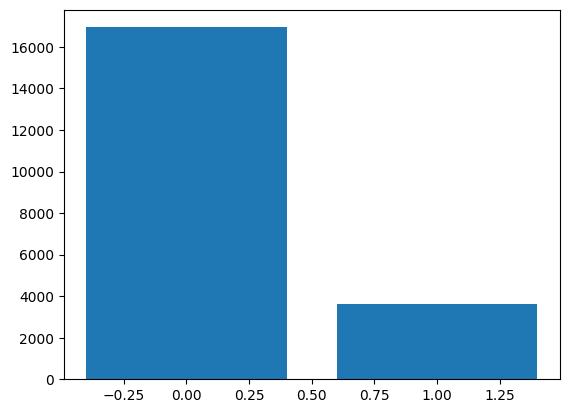

In [11]:
# Checking distribution of different values in mag_cluster values in barplot   
plt.bar(np.arange(2), rad['rad_cluster'].value_counts().values, align='center') # plot histogram for x and y data

## PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca_1 = PCA()  # Instantiate the PCA class
pca_1.fit(rad_normalized)
rad_pca_1 = pca_1.transform(rad_normalized)
print(rad_normalized.shape)
print(rad_pca_1.shape)

(20570, 8)
(20570, 8)


In [14]:
rad_pca_1

array([[ 0.1401343 ,  0.41718749,  0.82356406, ...,  0.23538666,
         0.32073192,  0.30779796],
       [-0.75349645,  0.14701875,  0.31893222, ..., -0.06824019,
         0.12543638, -0.07282092],
       [-0.72578004, -0.05445212,  0.40884301, ...,  0.10368925,
         0.00398179,  0.02433903],
       ...,
       [-0.93567077,  0.25929282,  0.09937547, ...,  0.00094537,
         0.02837523, -0.02120294],
       [-0.93567077,  0.25929282,  0.09937547, ...,  0.00094537,
         0.02837523, -0.02120294],
       [-0.93567077,  0.25929282,  0.09937547, ...,  0.00094537,
         0.02837523, -0.02120294]])

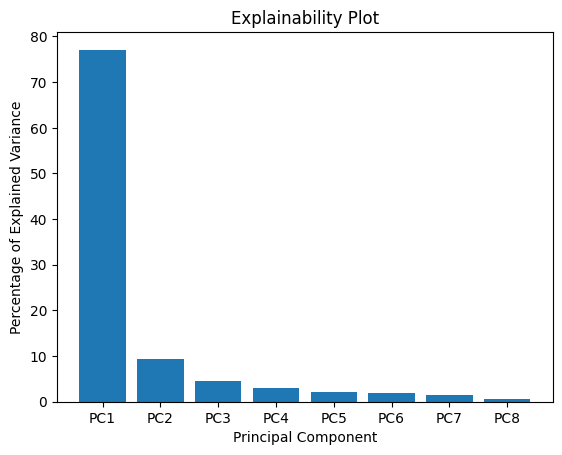

In [15]:
#calculating the percentage of variance that each PC explains
per_var = np.round(pca_1.explained_variance_ratio_* 100, decimals=1)
#making labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
#Plotting
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explainability Plot')
plt.show()

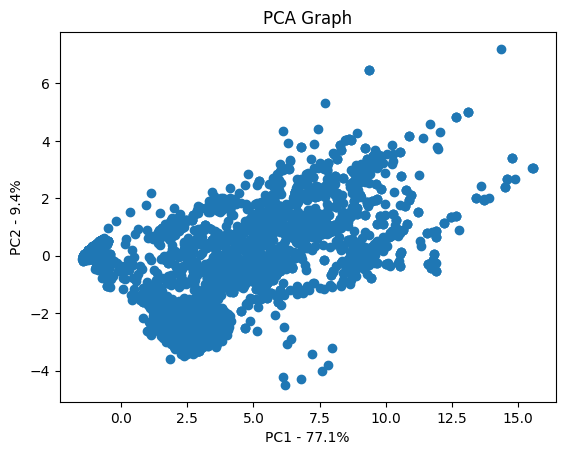

In [16]:
#putting the components in a dataframe
pca_df = pd.DataFrame(rad_pca_1, columns=labels)
#Making a scatter plot of PC1 and PC2
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
#labeling the axes with the percentage of variance explained
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()


77% of the data can be described by the first PCA and 9,4% on the second. In the visual it is seen that it is kind of hard to seperate clusters within the data using pca

In [17]:
pca_2 = PCA(n_components=3)
pca_2.fit(rad_normalized)
rad_pca_2 = pca_2.transform(rad_normalized)
print("original shape:   ", rad_normalized.shape)
print("transformed shape:", rad_pca_2.shape)

original shape:    (20570, 8)
transformed shape: (20570, 3)


In [18]:
rad_pca_df = pd.DataFrame(rad_pca_2, columns=['pca1', 'pca2', 'pca3'])
rad_pca_df.sample(10)

,pca1,pca2,pca3
9970,5.103808,0.550907,-2.115625
16909,-1.090601,0.177148,0.086682
1184,-1.078929,0.184390,0.081316
16844,-1.015018,0.136194,-0.012325
501,-0.978420,0.061236,-0.002915
19421,-1.252959,0.102070,-0.057043
15230,-0.861583,0.182957,0.087583
7365,-1.148916,0.107032,-0.140954
9864,4.267257,0.763743,-2.268361
9291,-0.942881,0.286380,0.085996


Next up im trying to use kmeans clustering on the PCA df with 3 components (dont know it that makes sense to do?)

In [27]:
# Clustering the radar data with 2 clusters using kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(rad_pca_df)

# Adding cluster labels to the rad dataframe
rad_pca_df['rad_cluster'] = kmeans.labels_

# Checking the result
rad_pca_df.sample(5)

,pca1,pca2,pca3,rad_cluster
193,-1.139411,0.123611,-0.078519,0
1181,-0.979408,0.141287,-0.040246,0
1298,-1.102979,0.178265,0.097524,0
9094,5.731601,-0.220657,3.372665,1
17780,-0.863501,0.152265,0.050001,0


## Visualising the optimal clusters

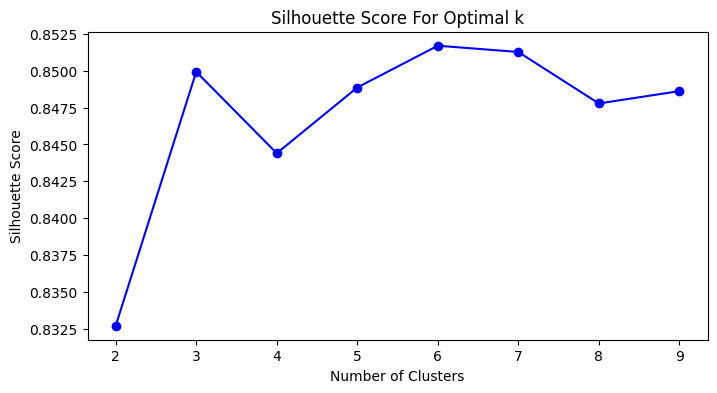

In [20]:
silhouette_avg = []
for k in range(2, 10):  # Starts from 2 clusters 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(rad_pca_df)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(rad_pca_df, cluster_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_avg, 'bo-')  # Adjust the range as needed
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

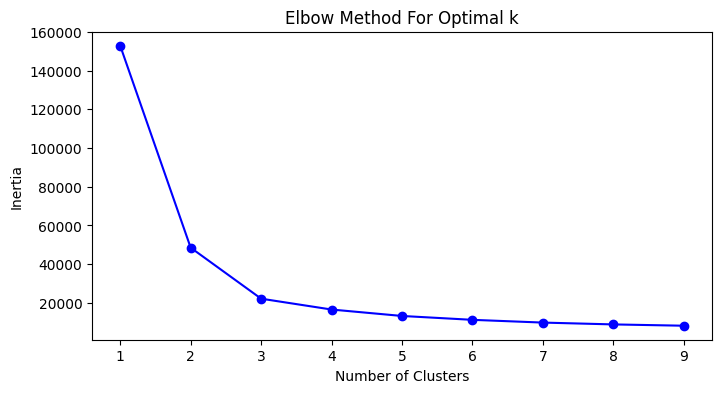

In [21]:
inertia = []
for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(rad_pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

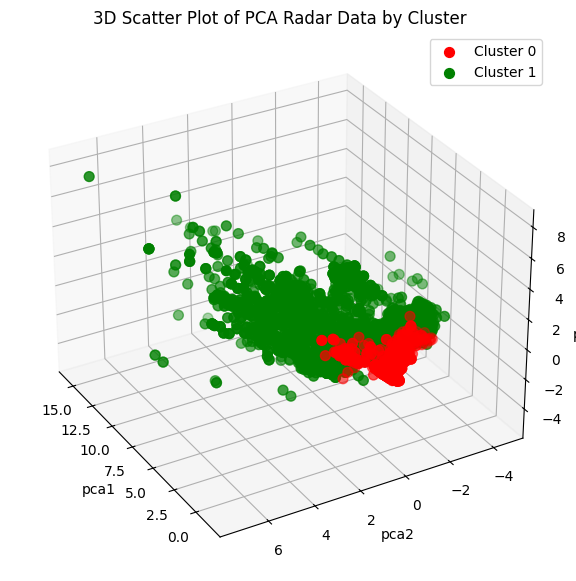

In [22]:
#Visualizing the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# List of colors, ensure you have enough colors for your clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'pink', 'lightblue', 'lightgreen']

# Loop through each cluster 
for i in rad_pca_df['rad_cluster'].unique():
    # Extract data points belonging to the current cluster
    cluster_data = rad_pca_df[rad_pca_df['rad_cluster'] == i]
    ax.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['pca3'], s=50, color=colors[i], label=f'Cluster {i}')

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
ax.set_title('3D Scatter Plot of PCA Radar Data by Cluster')
ax.legend()

# Set the view angle
ax.view_init(elev=30, azim=150
)

plt.show()

In [23]:
df_main['rad_cluster'] = rad_pca_df['rad_cluster']

In [24]:
df_main.sample(10)

,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi,rad_cluster
4682,2024-03-22 15:34:57.505,3.04,11.25,366,-83,-1313,7,6,6,6,6,5,5,5,PackageType.HEART_BEAT,2420,5,9.5,-97,0
670,2024-02-23 22:16:18.106,3.04,6.75,483,-98,-1593,8,7,6,5,6,4,6,6,PackageType.HEART_BEAT,822,5,7.2,-97,0
6994,2024-03-25 10:44:27.562,3.04,12.38,205,-804,-152,5,5,4,5,6,6,6,6,PackageType.CHANGE,6365,5,10.5,-97,0
2611,2024-03-06 20:20:24.410,3.10,1.12,798,-655,-713,5,5,4,5,5,5,3,4,PackageType.HEART_BEAT,1729,5,9.5,-93,0
501,2024-02-22 19:02:30.466,3.04,6.38,480,-100,-1579,7,7,5,5,6,6,6,5,PackageType.HEART_BEAT,756,5,6.8,-104,0
5118,2024-03-23 15:36:43.488,3.12,12.50,591,-640,-407,5,5,5,5,5,6,6,5,PackageType.HEART_BEAT,2753,5,8.8,-94,0
6210,2024-03-21 12:37:08.428,3.04,13.50,165,-804,-136,7,6,7,7,6,5,5,5,PackageType.CHANGE,5693,5,10.2,-93,0
2665,2024-03-08 18:18:44.931,3.04,0.50,528,-89,-1712,5,7,7,6,6,6,6,6,PackageType.HEART_BEAT,1635,5,7.8,-97,0
5093,2024-03-25 12:56:18.382,3.04,11.50,442,251,-1291,10,6,49,67,49,45,47,20,PackageType.HEART_BEAT,2568,5,8.5,-100,0
5616,2024-03-18 21:38:50.665,3.04,0.88,293,-833,-370,5,5,5,6,6,6,7,6,PackageType.HEART_BEAT,5175,5,9.5,-96,0


From here on we assume that the clusters are labels for the data and we can use them for further analysis
Cluster 0 is detection and 1 is no detection

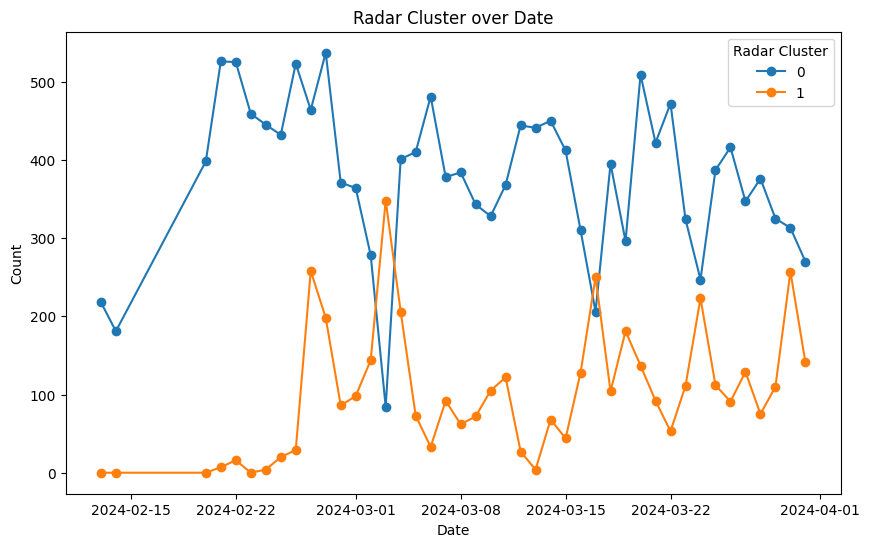

In [25]:
# Convert the 'time' column to datetime
df_main['time'] = pd.to_datetime(df_main['time'])

# Group the data by date and count the occurrences of each rad_cluster
grouped_data = df_main.groupby(df_main['time'].dt.date)['rad_cluster'].value_counts().unstack().fillna(0)

# Plot the line plot
grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Radar Cluster over Date')
plt.legend(title='Radar Cluster')
plt.show()


We need to split our PCA DataFrame into two Dataframes.

The features DataFrame will contain the inputs for training/inference.
The labels DataFrame will contain the target we are trying to predict.

In [33]:
features = rad_pca_df[["pca1", "pca2", "pca3"]]
labels = df_main[["rad_cluster"]]
print(features)
print(labels)

           pca1      pca2      pca3
0      0.140134  0.417187  0.823564
1     -0.753496  0.147019  0.318932
2     -0.725780 -0.054452  0.408843
3     -0.782530 -0.034068  0.163438
4     -0.782530 -0.034068  0.163438
...         ...       ...       ...
20565 -0.831920  0.443028  0.182773
20566 -0.831920  0.443028  0.182773
20567 -0.935671  0.259293  0.099375
20568 -0.935671  0.259293  0.099375
20569 -0.935671  0.259293  0.099375

[20570 rows x 3 columns]
      rad_cluster
0               0
1               0
2               0
3               0
4               0
...           ...
6027            0
6028            0
6029            0
6030            0
6031            0

[20570 rows x 1 columns]


We can split our features and labels into a train_set and a test_set. 

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)
y_train

,rad_cluster
5956,1
7260,1
2412,0
2986,0
2442,0
...,...
2531,0
1254,0
4951,0
1449,0


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [38]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test, y_pred, output_dict=True)
print(metrics)

{'0': {'precision': 0.9033381712626996, 'recall': 0.9667598633115875, 'f1-score': 0.9339735894357744, 'support': 3219.0}, '1': {'precision': 0.8400597907324364, 'recall': 0.6279329608938548, 'f1-score': 0.7186700767263428, 'support': 895.0}, 'accuracy': 0.893048128342246, 'macro avg': {'precision': 0.8716989809975679, 'recall': 0.7973464121027212, 'f1-score': 0.8263218330810586, 'support': 4114.0}, 'weighted avg': {'precision': 0.8895719703452019, 'recall': 0.893048128342246, 'f1-score': 0.887134346879882, 'support': 4114.0}}


In [39]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)
print(results)

[[3112  107]
 [ 333  562]]


<Axes: >

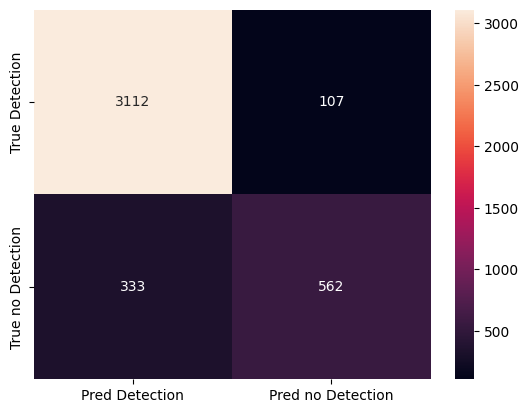

In [40]:
df_cm = pd.DataFrame(results, ['True Detection', 'True no Detection'],
                     ['Pred Detection', 'Pred no Detection'])

sns.heatmap(df_cm, annot=True, fmt='g')

In [41]:
!pip install gradio --quiet
!pip install typing-extensions==4.3.0

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.2 requires typing-extensions>=4.8.0, but you have typing-extensions 4.3.0 which is incompatible.
fastapi 0.110.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.3.0 which is incompatible.
pydantic 2.7.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.3.0 which is incompatible.
pydantic-core 2.18.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.3.0 which is incompatible.


In [42]:
import gradio as gr

/home/codespace/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We probably need a pipeline for making the 8 radar values into pca1, 2 and 3

The gradio is not perfect either

In [43]:
def detec(pca1, pca2, pca3):
    input_list = [pca1, pca2, pca3]
    res = model.predict(np.asarray(input_list).reshape(1, -1))
    prediction = res[0]
    # Convert numerical prediction to string label
    if prediction == 1:
        label = "No Detection"
    else:
        label = "Detection"
    return label

demo = gr.Interface(
    fn=detec,
    title="Detection or No Detection Predictive Analytics",
    description="Experiment with pca1, pca2, pca3 values to predict if there's a detection or not.",
    allow_flagging="never",
    inputs=[
        gr.Number(value=1.0, label="PCA1 value"),
        gr.Number(value=1.0, label="PCA2 value"),
        gr.Number(value=1.0, label="PCA3 value"),
    ],
    outputs=gr.Label()
)

demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://09cf22d1a254a483d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
